<a href="https://colab.research.google.com/github/Hristo2076/ml_processes/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Цель:**
**изучить применение методов оптимизации для решения задачи классификации**

In [381]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [382]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df[:50:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
10,5.4,3.7,1.5,0.2,0.0
20,5.4,3.4,1.7,0.2,0.0
30,4.8,3.1,1.6,0.2,0.0
40,5.0,3.5,1.3,0.3,0.0


In [383]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

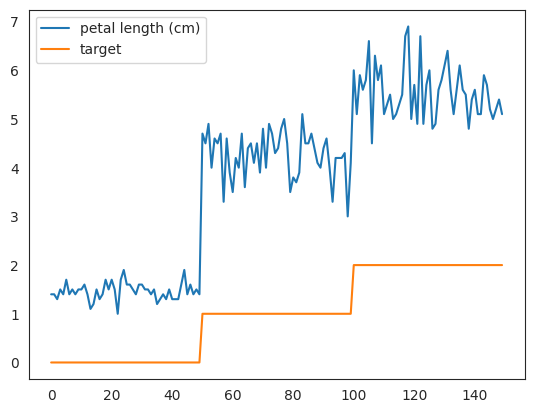

In [384]:
df[['petal length (cm)','target']].plot()

In [385]:
#leave only Iris Versicolor, Iris Virginica
df = df[df.target != 0.]

In [386]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(df.target)
df.target = le.transform(df.target)

<ipython-input-386-c60a7db8a3d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target = le.transform(df.target)


In [387]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


<Axes: >

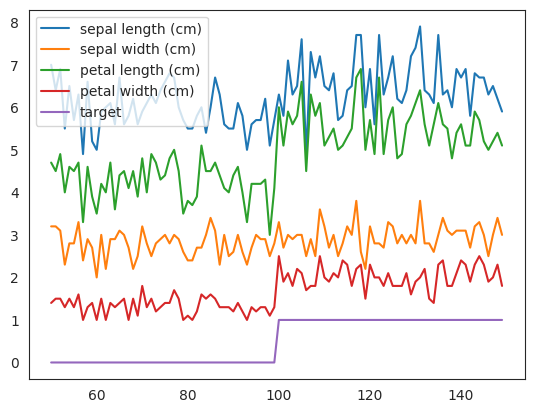

In [388]:
df.plot()

**In order not to bring down our model, I suggest removing parameters that won't change significantly.**

In [389]:
df = df.drop(['sepal width (cm)','sepal length (cm)'],axis=1)

In [390]:
df[:5]

,petal length (cm),petal width (cm),target
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0


<Axes: >

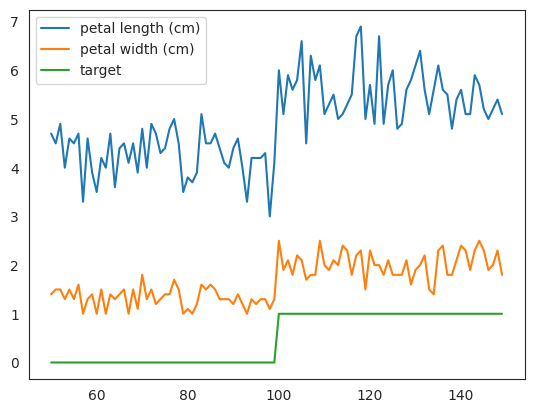

In [391]:
df.plot()

In [392]:
df1 = df.loc[df.target == 1.]
df2 = df.loc[df.target == 2.]


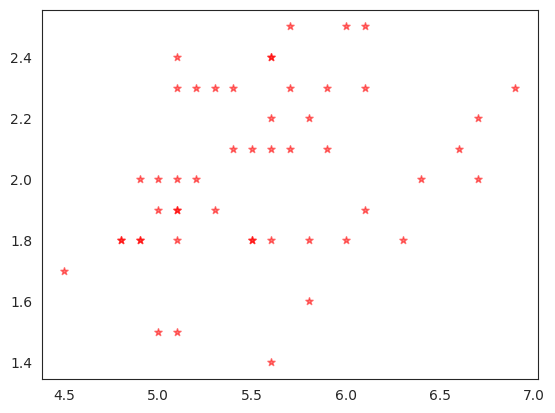

In [393]:

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],s=30,
            alpha=0.5,
            marker='*',
            color = 'r'
            )
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],s=30,
            alpha=0.5,
            marker= 7,
            color = 'g'
            )
plt.show()

In [394]:
X = df.drop('target',axis=1)
y= df.target.values

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 train_size=0.8,
                                                 test_size = 0.2)

##**LogisticRegression**

In [395]:
# Собственная реализация логистической регрессии
import time

class MyLogisticRegression:
  def __init__(self,epoch=1000,learning_rate=0.01,learn_method='sgd',stop_rate=0.0001): 
    self.epoch = epoch 
    self.learn_method = learn_method 
    self.learning_rate = learning_rate 
    self.stop_rate = stop_rate 
    self.learn_func = None 
    self.cost_func = None 

    self.weights = None
    self.epoch_passed = 0
    self.learn_time = 0

    if(self.learn_method == 'sgd'):
      self.learn_func = self.learn_sgd
    elif(self.learn_method == 'rmsprop'):
      self.learn_func = self.learn_rmsprop
    elif(self.learn_method == 'adam'):
      self.learn_func = self.learn_adam
    elif(self.learn_method == 'nadam'):
      self.learn_func = self.learn_nadam
    else:
      raise Exception('Unknown learining method: {}'.format(self.learn_method))


  '''
    производит начальное инициализирование весов
  '''
  def init_weights(self,X):
    #return np.random.randn(X.shape[1], 1);
    return np.zeros((X.shape[1], 1))

  '''
    осуществляет обучение модели
  '''
  def fit(self,X,Y):
    X = self.addones(X)
    Y = np.reshape(Y, (len(Y), 1))
    W = self.init_weights(X)

    self.epoch_passed = 0
    self.learn_time = 0

    start = time.perf_counter()
    self.learn_func(X,Y,W)
    self.learn_time = time.perf_counter() - start


  '''
    возвращает отношение количества правильных ответов к общему
    количеству ответов обученной модели
  '''
  def score(self,X,Y):
    predictions = self.predict(X)
    scores = []
    for idx, y_pred in enumerate(predictions):
      # заполняем True если предсказание верное, иначе False
      scores.append(True if y_pred == Y[idx] else False)

    return scores.count(True)/len(scores)

  '''
    возвращает количество прошедших итераций обучения
  '''
  def n_iter(self):
    return self.epoch_passed

  '''
    возвращает время обучения
  '''
  def time(self):
    return self.learn_time    

  '''
    возвращает список вероятностей ответа на основании признаков
  '''
  def predict_proba(self,X):
    X = self.addones(X)

    return self.sigmoid_linear_regression(X,self.weights)

  '''
    предсказывает ответ обученной модели на основании признаков
  '''
  def predict(self,X):
    probas = self.predict_proba(X)
    for idx, y in enumerate(probas):
      probas[idx] = 1 if y > 0.5 else 0

    return probas

  '''
    добавляет единичный вектор к вектору признаков
  '''
  def addones(self,X):
    return np.hstack((np.ones((X.shape[0],1)),X))

  '''
    метод, реализующий стохастический градиентный спуск (SGD)
  '''
  def learn_sgd(self,X,Y,W):
    prev = self.cost_binary_cross_entropy(X,Y,W)
    for enum in range(self.epoch):
      self.epoch_passed = enum+1
      gradients = self.gradient(X,Y,W)
      W = W-self.learning_rate*gradients
      actual = self.cost_binary_cross_entropy(X,Y,W)
      diff = abs(prev - actual)
      if(diff <= self.stop_rate):
        break
      prev = actual
      
    self.weights = W
    return W

  '''
    метод, реализующий улучшенный градиентный спуск
    на основе rmsprop
  '''
  def learn_rmsprop(self,X,Y,W):
    prev = self.cost_binary_cross_entropy(X,Y,W)
    lr = self.learning_rate
    cached_rmsprop = [0] * len(W)
    decay_rate = 0.9
    for enum in range(self.epoch):
      self.epoch_passed = enum+1

      gradients = self.gradient(X,Y,W)
      NEW_W = []
      for i, (w, grad) in enumerate(zip(W, gradients)):
        cached_rmsprop[i] = decay_rate * cached_rmsprop[i] + (1-decay_rate) * grad **2
        new_w = w-lr*grad/(np.sqrt(cached_rmsprop[i]+1e-6))
        NEW_W.append(new_w)

      W = NEW_W
      actual = self.cost_binary_cross_entropy(X,Y,W)
      diff = abs(prev - actual)
      if(diff <= self.stop_rate):
        break
      prev = actual
      
    self.weights = W
    return W

  '''
    метод, реализующий улучшенный градиентный спуск
    на основе adam
  '''
  def learn_adam(self,X,Y,W):
    prev = self.cost_binary_cross_entropy(X,Y,W)
    lr = self.learning_rate
    m = [0] * len(W)
    v = [0] * len(W)
    t = 1
    beta1 = 0.9
    beta2 = 0.999
    for enum in range(self.epoch):
      self.epoch_passed = enum+1

      gradients = self.gradient(X,Y,W)
      NEW_W = []
      for i, (w, grad) in enumerate(zip(W, gradients)):
        m[i] = beta1 * m[i] + (1-beta1) * grad
        v[i] = beta2 * v[i] + (1-beta2) * grad **2
        m_corrected = m[i]/(1-beta1**t)
        v_corrected = v[i]/(1-beta2**t)

        new_w = w-lr*m_corrected/(np.sqrt(v_corrected+1e-8))

        NEW_W.append(new_w)

      t += 1

      W = NEW_W
      actual = self.cost_binary_cross_entropy(X,Y,W)
      diff = abs(prev - actual)
      if(diff <= self.stop_rate):
        break
      prev = actual
      
    self.weights = W
    return W

  '''
    метод, реализующий улучшенный градиентный спуск
    на основе adam
  '''
  def learn_nadam(self,X,Y,W):
    prev = self.cost_binary_cross_entropy(X,Y,W)
    lr = self.learning_rate
    m = [0] * len(W)
    v = [0] * len(W)
    t = 1
    beta1 = 0.9
    beta2 = 0.999
    for enum in range(self.epoch):
      self.epoch_passed = enum+1
      
      gradients = self.gradient(X,Y,W)
      NEW_W = []
      for i, (w, grad) in enumerate(zip(W, gradients)):
        m[i] = beta1 * m[i] + (1-beta1) * grad
        v[i] = beta2 * v[i] + (1-beta2) * grad **2
        m_corrected = m[i]/(1-beta1**t)
        v_corrected = v[i]/(1-beta2**t)

        new_w = w - (lr/(np.sqrt(v_corrected)+1e-8)*(beta1*m_corrected+(1-beta1)*grad/(1-beta1**t)))

        NEW_W.append(new_w)

      t += 1

      W = NEW_W
      actual = self.cost_binary_cross_entropy(X,Y,W)
      diff = abs(prev - actual)
      if(diff <= self.stop_rate):
        break
      prev = actual
      
    self.weights = W
    return W


  '''
    функция бинарной кросс-энтропии (векторная версия)
  '''
  def cost_binary_cross_entropy(self,X,Y,W):
    m = X.shape[0]
    total_cost = -(1 / m) * np.sum(
        Y * np.log(self.sigmoid_linear_regression(X, W)) + (1 - Y) * np.log(
            1 - self.sigmoid_linear_regression(X, W)))
    return total_cost    

  '''
    производная от функции бинарной кросс-энтропии (векторная версия)
  '''
  def gradient(self, X,Y,W):
    m = X.shape[0]
    return (1 / m) * np.dot(X.T, self.sigmoid_linear_regression(X,W) - Y)    

  '''
    главная функция логистической регрессии
  '''
  def sigmoid_linear_regression(self,X,W):
    return self.sigmoid(self.linear_regression(X,W))

  '''
    функция линейной регрессии
  '''
  def linear_regression(self,X,W):
    return np.dot(X,W)

  '''
    функция сигмоиды (логистическая функция)
  '''
  def sigmoid(self,H):
    return 1/(1+np.exp(-H))




In [396]:
results = pd.DataFrame(columns=['Method','Score','Iterations','Time'])

##**Stochastic Gradient Descent**

In [397]:
# SGD (классический градиентный спуск)
my_model = MyLogisticRegression(learn_method='sgd',epoch=2000)
my_model.fit(X_train,y_train)
my_score = my_model.score(X_train,y_train)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"SGD score is: {my_score}")
print(f"SGD iter number: {my_iter}")
print(f"SGD time: {my_time} sec")
results.loc[len(results)] = ['MY SGD',my_score,my_iter,my_time]

SGD score is: 0.525
SGD iter number: 33
SGD time: 0.002524728999560466 sec


##**Root Mean Square Propagation (RMSProp)**

In [398]:
# RMSPROP
my_model = MyLogisticRegression(learn_method='rmsprop',epoch=2000)
my_model.fit(X_train,y_train)
my_score = my_model.score(X_train,y_train)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"RMSPROP score is: {my_score}")
print(f"RMSPROP iter number: {my_iter}")
print(f"RMSPROP time: {my_time} sec")
results.loc[len(results)] = ['MY RMSPROP',my_score,my_iter,my_time]

RMSPROP score is: 0.65
RMSPROP iter number: 61
RMSPROP time: 0.012327815999015002 sec


##**Nesterov–accelerated Adaptive Moment Estimation (Nadam)**

In [399]:
# ADAM
my_model = MyLogisticRegression(learn_method='adam',epoch=2000)
my_model.fit(X_train,y_train)
my_score = my_model.score(X_train,y_train)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"ADAM score is: {my_score}")
print(f"ADAM iter number: {my_iter}")
print(f"ADAM time: {my_time} sec")
results.loc[len(results)] = ['MY ADAM',my_score,my_iter,my_time]

# NADAM
my_model = MyLogisticRegression(learn_method='nadam',epoch=2000)
my_model.fit(X_train,y_train)
my_score = my_model.score(X_train,y_train)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"NADAM score is: {my_score}")
print(f"NADAM iter number: {my_iter}")
print(f"NADAM time: {my_time} sec")
results.loc[len(results)] = ['MY NADAM',my_score,my_iter,my_time]


ADAM score is: 0.9375
ADAM iter number: 1246
ADAM time: 0.23653113299951656 sec
NADAM score is: 0.9375
NADAM iter number: 1238
NADAM time: 0.20399795500270557 sec


##**DataFrame with resoults**

In [400]:
results

,Method,Score,Iterations,Time
0,MY SGD,0.5250,33,0.002525
1,MY RMSPROP,0.6500,61,0.012328
2,MY ADAM,0.9375,1246,0.236531
3,MY NADAM,0.9375,1238,0.203998
